## Final Project Submission

Please fill out:
* Group name: Group 7

1. Lily Chepngetich
2. Faith Koech
3. Tiffany Eva
4. Munene Gitonga
5. Timothy Munene
6. Thomas Amuti


* Student pace: self paced / part time / full time: Part time

# Project Overview

This project will employ exploratory data analysis to generate actionable insights that inform strategic decisions for business stakeholders.

# Business Understanding

As major companies increasingly invest in original video content, our company has decided to enter the entertainment industry by launching a new movie studio. However, the organization currently lacks experience in film production and does not have a clear strategy for deciding what types of movies to create.

The primary business goal of this project is to reduce the risk associated with entering the movie industry by using data-driven insights to understand which types of films are performing best at the box office today and identify patterns related to movie genre, rating, viewership, and finanical performance (income generation and production costs).

By analyzing current box office trends and successful films, this project will provide actionable insights that can guide the leadership of the new movie studio in making informed decisions about what kinds of movies to produce. These insights will help the studio prioritize film types that are more likely to achieve commercial success, maximize return on investment, and compete effectively with established studios.

Ultimately, the findings from this analysis will support strategic decision-making around film development, allowing the company to enter the market with a clearer understanding of audience demand and industry trends.

## Business Goal

To determine which movie genres are the most commercially successful and financially viable.

## Business Question

What movie genres are the most commercially successful and financially viable?

### Specific Questions:

1. Which genres are commonly produced?

2. Which genres received the highest audience ratings?

    * Were these differences statistically significant?

3. Which genres attracted the largest audiences/ viewership?

4. What was the production costs of the 5 most common movie genres?

5. What was the income generated from the 5 most common movie genres?

#### Sub-analysis

1. What is the relationship between production costs and gross income?


# Data Understanding

## Data Source and Description

For this project, we will leverage multiple data sources to identify the most promising types of films to produce:

1. IMDB – Provided in SQL database format, containing detailed movie metadata, ratings, and cast/crew information.

2. Box Office Mojo – CSV/TSV files with box office performance data, including domestic and international gross.

3. The Numbers – CSV/TSV files offering financial data such as production budgets, box office performance, and revenue trends.

These diverse sources will allow us to combine financial, audience, and critical metrics to generate actionable insights for the new movie studio.


# Data Preparation and Cleaning

For this section, we will analyze each Data Source individually and in each, we will aim to:

1. To read into the Data Source.

2. Select the Columns that we plan to use to answer our business questions.

3. Check through the data in the Sources to sort out any missing or duplicate data.

4. Save the 'New' Data of the 4 Data Sources as different pandas files.

In [1]:
# Import sqlite3, pandas and numpy to help in data cleaning

import sqlite3
import pandas as pd
import numpy as np


#### Starting off with the IMDB SQL file

In [2]:
# Starting off with the IMDB file which is an SQLite format
# We first need to unzip it using necessary libraries

import zipfile
from pathlib import Path

import zipfile
from pathlib import Path

# Path to the zip file
zip_path = Path('C:/Users/PC/Desktop/movies_project_moringa/zippedData/im.db.zip')

# Folder to extract to
extract_folder = zip_path.parent  # same folder as the zip file

# Open and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [3]:
# Next we read into the IMDB file by creating connection then using Pandas_SQL to read

# Create a connection

conn = sqlite3.connect('C:/Users/PC/Desktop/movies_project_moringa/zippedData/im.db')

cursor = conn.cursor()

# read into the file using Pandas-SQL query and see the tables that we have

tables = pd.read_sql_query("""
SELECT *
FROM sqlite_master
WHERE type = 'table';
""", conn)

print(tables)

    type           name       tbl_name  rootpage  \
0  table   movie_basics   movie_basics         2   
1  table      directors      directors         3   
2  table      known_for      known_for         4   
3  table     movie_akas     movie_akas         5   
4  table  movie_ratings  movie_ratings         6   
5  table        persons        persons         7   
6  table     principals     principals         8   
7  table        writers        writers         9   

                                                 sql  
0  CREATE TABLE "movie_basics" (\n"movie_id" TEXT...  
1  CREATE TABLE "directors" (\n"movie_id" TEXT,\n...  
2  CREATE TABLE "known_for" (\n"person_id" TEXT,\...  
3  CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\...  
4  CREATE TABLE "movie_ratings" (\n"movie_id" TEX...  
5  CREATE TABLE "persons" (\n"person_id" TEXT,\n ...  
6  CREATE TABLE "principals" (\n"movie_id" TEXT,\...  
7  CREATE TABLE "writers" (\n"movie_id" TEXT,\n  ...  


In [4]:
# From this IMDB SQL file, we are only interested in the averagerating and ordering columns
# We will extract these and store them as a pandas dataframe

IMDB_df = pd.read_sql_query("""
SELECT mb.movie_id, mb.genres, mr.averagerating, mr.numvotes, ma.ordering
FROM movie_basics as mb
JOIN movie_ratings as mr
ON mb.movie_id = mr.movie_id
JOIN movie_akas as ma
ON mr.movie_id = ma.movie_id
GROUP BY mb.genres;
""", conn)

# Let us check the IMDB_df to confirm that we have the columns of choice
IMDB_df.head() # great, we have created a pandas dataframe with only the columns we need from the SQL file

,movie_id,genres,averagerating,numvotes,ordering
0,tt0253093,None,6.6,8,1
1,tt0364201,Action,6.4,16,1
2,tt6848590,"Action,Adult,Comedy",3.4,28,1
3,tt1136688,"Action,Adventure",3.3,1428,1
4,tt0448694,"Action,Adventure,Animation",6.6,133355,1


##### Data cleaning and saving of the IMDB_df

In [5]:
# check for missing data
IMDB_df.isna().sum() # There is only 1 missing data in the genres.

# Checking the length of the IMDB_df
len(IMDB_df) # There is 915 data entries. So we will just drop the 1 missing value without any effect on analysis

# dropping the missing value and saving using inplace = True
IMDB_df.dropna(inplace = True)

# confirming that we have dropped the 1 missing value
IMDB_df.isna().sum() # We have dropped the missing value

movie_id         0
genres           0
averagerating    0
numvotes         0
ordering         0
dtype: int64

In [6]:
# Next we check for any duplicate data within the IMDB_df
IMDB_df.duplicated().sum() # There are no duplicated values

0

In [7]:
# Checking the general information of the IMDB dataframe before saving it, and confirming that our values for average rating, num of votes and ordering are numerical
IMDB_df.info() # the IMDB_df data have the right data-type designation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 1 to 914
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       914 non-null    object 
 1   genres         914 non-null    object 
 2   averagerating  914 non-null    float64
 3   numvotes       914 non-null    int64  
 4   ordering       914 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 42.8+ KB


In [8]:
# To make analysis easier later and make pushing easier as well, we will save our IMDB_df as a csv file and place index = False to prevent duplication of indices
IMDB_df.to_csv('IMDB_data.csv', index = False)

#### Next we read into, clean and save our Box Office Mojo Data

In [9]:
# read our csv file using pandas
box_office_df = pd.read_csv('C:/Users/PC/Desktop/movies_project_moringa/zippedData/bom.movie_gross.csv.gz')

# confirm that we have read into the file
box_office_df['title'].head()

# This data seems not to group the movies in genres but instead has individual movie titles. We will use our business understanding and research to classify our movie titles into movie genres later during analysis.

0                                    Toy Story 3
1                     Alice in Wonderland (2010)
2    Harry Potter and the Deathly Hallows Part 1
3                                      Inception
4                            Shrek Forever After
Name: title, dtype: object

In [10]:
# Checking the columns in the box_office_df
box_office_df.columns # we are only interested in the title, domestic_gross and foreign_gross columns

# selecting the columns
box_office_df = box_office_df[['title', 'domestic_gross', 'foreign_gross']] # we have focused on the columns of interest


In [11]:
# Checking the general information of the dataframe to confirm that the columns have the right data type designation

box_office_df.info() # All are okay apart from the foreign_gross which is designated as object yet it is expected to be numerical for us to analyze it
# we will first get rid of all missing values then convert the foreign_gross data to numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
dtypes: float64(1), object(2)
memory usage: 79.5+ KB


##### Data Cleaning and Saving the Box_office_df

In [12]:
# checking for missing data and total length of the dataframe
box_office_df.isna().sum() # There are 28 domestic gross missing values and 1350 missing foreign gross values
len(box_office_df) # There are a total of 3387 data entries. The missing 1350 values make up approximately 40% of the total data. Replacing all this data with mean or median might distort the analysis, therefore we opt to drop all missing values.

# dropping missing values and saving using inplace = True.
box_office_df.dropna(inplace = True)

# confirming whether there are any remaining missing values
box_office_df.isna().sum() # All missing values are dropped.

title             0
domestic_gross    0
foreign_gross     0
dtype: int64

In [13]:
# Converting foreign_gross from object to numerical data type
box_office_df['foreign_gross'] = box_office_df['foreign_gross'] .replace('[\$,]', '', regex=True).astype(float)

# confirming that the data types in the box_office df are now in order
box_office_df.info() #Achieved

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   domestic_gross  2009 non-null   float64
 2   foreign_gross   2009 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.8+ KB


In [14]:
# saving the box_office_df for later analysis

box_office_df.to_csv('box_office_data.csv', index = False)

#### Finally, we read into our final selected movie data source - The Numbers Data

In [15]:
# Read using pandas
numbers_df = pd.read_csv("C:/Users/PC/Desktop/movies_project_moringa/zippedData/tn.movie_budgets.csv.gz", sep = ",", encoding = "latin1")

# check that our file has been read
numbers_df.head()

# Checking the columns in the data
numbers_df.columns

# select only the columns we need
numbers_df = numbers_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]

##### Data cleaning and Saving the Numbers_df

In [16]:
# checking for missing data
numbers_df.isna().sum() # There are no missing values

# Checking for duplicates
numbers_df.duplicated().sum() # There are no duplicated values

# checking into the datatypes of the columns before saving our data
numbers_df.info() # the production budget, domestic gross and worldwide gross are all objects. 

# converting objects into numerical data types
numbers_df['production_budget'] = numbers_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)  
numbers_df['domestic_gross'] = numbers_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)  
numbers_df['worldwide_gross'] = numbers_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)  

# recheck the datatypes to confirm the change
numbers_df.info() # Change has been effected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   object
 2   domestic_gross     5782 non-null   object
 3   worldwide_gross    5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(1)
memory usage: 180.8+ KB


In [17]:
# Saving our edited Numbers_df

numbers_df.to_csv('Numbers_data.csv')

# Data Analysis and Visualization

In [18]:
# importing additional necessary libraries for statistical analysis and visualization
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Business Question 1: Which genres are commonly produced?

In [19]:
IMDB_df.dropna(subset=['genres'], inplace=True)

# Split "Action,Adventure" -> "Action", "Adventure" (Separate rows)
IMDB_df = IMDB_df.assign(genres=IMDB_df['genres'].str.split(',')).explode('genres')

# Count the movies per genre and take the Top 10
genre_counts = IMDB_df['genres'].value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count'] # Rename for cleaner plotting
genre_counts

,Genre,Count
0,Drama,213
1,Comedy,185
2,Documentary,173
3,Action,153
4,Adventure,138
5,Thriller,126
6,Horror,125
7,Family,121
8,Romance,120
9,Fantasy,116


Findings show that Drama, Comedy, Documentary, Action and Adventure were the most commonly produced.

Business Question 2: Which genres received the highest audience rating? (average rating and number of votes)

In [20]:
# Assuming IMDB_df is your dataframe
genre_ratings = (
    IMDB_df
    .groupby('genres')
    .agg(
        avg_rating=('averagerating', 'mean'),
        total_votes=('numvotes', 'sum')
    )
    .sort_values(by='avg_rating', ascending=False)
)

print(genre_ratings.head())

top_10_ratings = (
    genre_ratings[genre_ratings['total_votes'] > 50]
    .sort_values(by='avg_rating', ascending=False)
    .head(10)
)

# 5. Display the result
print("Top 10 Highest Rated Genres (with >50 movies):")
print(top_10_ratings)

             avg_rating  total_votes
genres                              
Documentary    7.351445       253867
Game-Show      7.300000         3469
News           6.861765         2586
Music          6.686207       446132
Biography      6.680000       658514
Top 10 Highest Rated Genres (with >50 movies):
             avg_rating  total_votes
genres                              
Documentary    7.351445       253867
Game-Show      7.300000         3469
News           6.861765         2586
Music          6.686207       446132
Biography      6.680000       658514
Reality-TV     6.460000          295
War            6.440984       456806
History        6.402679       520699
Animation      6.347321       479404
Drama          6.310798      5554183


Documentary, Gameshow and News received the highest audience ratings.
   Biography, Music and Documetary received the highest total votes.


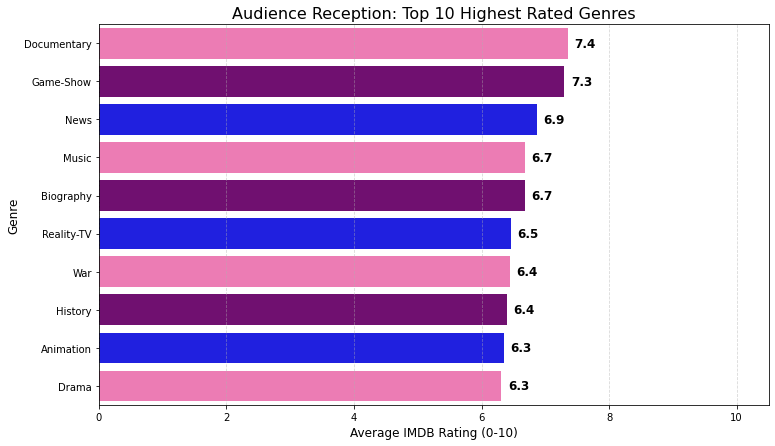

In [21]:
# Visualization of the movies with the highest audience ratings.
# 1. PREPARE THE DATA
# We ensure the index is reset so 'genres' becomes a proper column
# We check if 'genres' is already a column or if it's the index
# Ensure 'genres' is a column
if 'genres' not in top_10_ratings.columns:
    top_10_ratings = top_10_ratings.reset_index()

    plt.figure(figsize=(12, 7))

# Custom palette (fixed)
custom_palette = sns.color_palette(["#ff69b4", "#800080", "#0000ff"], n_colors=10)

# Horizontal bar chart
ax = sns.barplot(x='avg_rating', y='genres', data=top_10_ratings, palette=custom_palette)

# Add labels
for bar in ax.patches:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}',
            ha='left', va='center', fontsize=12, fontweight='bold')

# Formatting
plt.title('Audience Reception: Top 10 Highest Rated Genres', fontsize=16)
plt.xlabel('Average IMDB Rating (0-10)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xlim(0, 10.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [22]:
# Using the ANOVA test to assess for statistical significant differences on rating based on movie genres

# 1. Null hypothesis - Movie genres do not differ on ratings.
# 2. Alternative hypothesis - Movie genres differ on ratings.

# We'll first explode multi-genre entries so we can count individual genres and pick truly popular ones
genre_exploded = IMDB_df.assign(genres=IMDB_df['genres'].str.split(',')).explode('genres')

# Count individual genre occurrences and define 'popular_genres'
popular_genres = genre_exploded['genres'].value_counts()

# Select top 3 genres that have at least 2 movies (ANOVA needs >=2 observations per group)
top_candidates = popular_genres[popular_genres >= 2]

if len(top_candidates) < 2:
    print("Not enough genres with >=2 movies to perform ANOVA.")
else:
    top_3 = top_candidates.index[:3]
    groups = [genre_exploded.loc[genre_exploded['genres'] == g, 'averagerating'] for g in top_3]

    # Print group sizes for transparency
    for g, grp in zip(top_3, groups):
        print(f"{g}: n={len(grp)}")

    # perform ANOVA
    f_val, p_val = stats.f_oneway(*groups)
    print(f"ANOVA F-stat: {f_val:.2f}, p-value: {p_val:.5f}")
    if p_val < 0.05:
        print("✅ The difference in ratings is statistically significant.")
    else:
        print("No statistically significant difference found (p >= 0.05).")

Drama: n=213
Comedy: n=185
Documentary: n=173
ANOVA F-stat: 46.38, p-value: 0.00000
✅ The difference in ratings is statistically significant.


Our ANOVA test p value was <0.05. This suggested that there is a high possibility that our null hypothesis was not true. Given that the null hypothesis was that 'Movies did not differ on ratings', our p value suggests that they actually did. Therefore we reject the null hypothesis and accept the alternative.

Business Question 3: Which genres had the largest viewership?

In [23]:
# Using the IMDB dataframe, let's relook at it.
IMDB_df

,movie_id,genres,averagerating,numvotes,ordering
1,tt0364201,Action,6.4,16,1
2,tt6848590,Action,3.4,28,1
2,tt6848590,Adult,3.4,28,1
2,tt6848590,Comedy,3.4,28,1
3,tt1136688,Action,3.3,1428,1
...,...,...,...,...,...
911,tt1561768,War,6.1,7054,1
912,tt1530983,Thriller,6.4,7874,1
912,tt1530983,Western,6.4,7874,1
913,tt1512306,War,9.0,5,1


In [24]:
# we first group the number of votes based on gender and assign this to a variable name 'genre_viewership'

genre_viewership = (
    IMDB_df
    .groupby('genres')['numvotes']
    .sum()
    .sort_values(ascending=False)
)

genre_viewership

genres
Adventure      7205453
Drama          5554183
Action         5234593
Fantasy        4339844
Sci-Fi         4300344
Comedy         2815164
Thriller       2492393
Mystery        2261082
Family         1536155
Crime          1197243
Horror          911210
Romance         835710
Musical         811837
Biography       658514
Western         590119
History         520699
Animation       479404
War             456806
Music           446132
Sport           287633
Documentary     253867
Game-Show         3469
News              2586
Reality-TV         295
Adult              156
Name: numvotes, dtype: int64

Adventure, Drama, Action, Fantasy and Sci-Fi received the largest audience viewership.

In [25]:
# Next we look at the to 10 most commonly viewed movie genres.
genre_viewership.head(10)

genres
Adventure    7205453
Drama        5554183
Action       5234593
Fantasy      4339844
Sci-Fi       4300344
Comedy       2815164
Thriller     2492393
Mystery      2261082
Family       1536155
Crime        1197243
Name: numvotes, dtype: int64

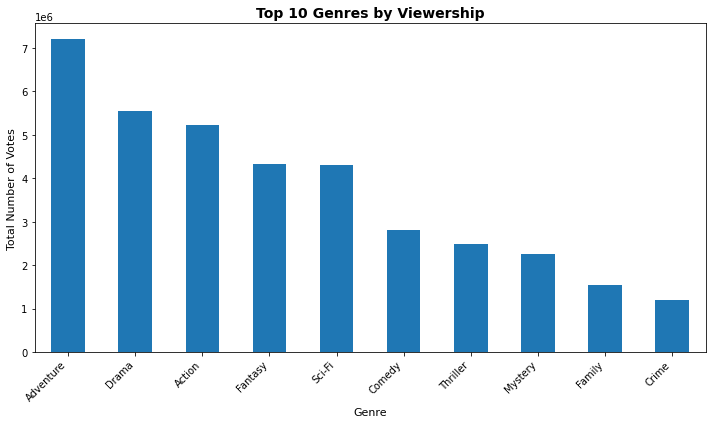

In [26]:
# Visualization of the top 10 most common viewed movie genres.
import matplotlib.pyplot as plt
plt.figure(figsize =(10,6))
genre_viewership.head(10).plot(kind='bar')
plt.title('Top 10 Genres by Viewership', fontsize=14,fontweight='bold')
plt.xlabel('Genre',fontsize=11)
plt.ylabel('Total Number of Votes',fontsize=11)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.tight_layout()
plt.show()

Business Question 4: What was the production costs of the 5 most common movie genres?

In [27]:

 # Using data from numbers_df to determine which 5 movies had the highest vs lowest production costs, looking at the data again
IMDB_df 


,movie_id,genres,averagerating,numvotes,ordering
1,tt0364201,Action,6.4,16,1
2,tt6848590,Action,3.4,28,1
2,tt6848590,Adult,3.4,28,1
2,tt6848590,Comedy,3.4,28,1
3,tt1136688,Action,3.3,1428,1
...,...,...,...,...,...
911,tt1561768,War,6.1,7054,1
912,tt1530983,Thriller,6.4,7874,1
912,tt1530983,Western,6.4,7874,1
913,tt1512306,War,9.0,5,1


In [28]:
# Using data from numbers_df to determine which 5 movies had the highest production costs

#Selecting relevant columns
budget_df = numbers_df[["movie", "production_budget"]]

#Top 5 highest Production budgets

highest_budget_movies = (
    budget_df
    .sort_values(by="production_budget", ascending=False)
    .head(5)
)

highest_budget_movies




,movie,production_budget
0,Avatar,425000000.0
1,Pirates of the Caribbean: On Stranger Tides,410600000.0
2,Dark Phoenix,350000000.0
3,Avengers: Age of Ultron,330600000.0
4,Star Wars Ep. VIII: The Last Jedi,317000000.0


Avatar, Pirates of the Carribean, Dark Pheonix, Avengers, Stars Wars had the highest production budget.

In [29]:
# Top 5 movies with the lowest production costs

lowest_budget_movies = (
    budget_df
    .sort_values(by="production_budget", ascending=True)
    .head(5)
)

lowest_budget_movies

,movie,production_budget
5781,My Date With Drew,1100.0
5780,A Plague So Pleasant,1400.0
5779,Return to the Land of Wonders,5000.0
5778,Following,6000.0
5776,The Mongol King,7000.0


My Date with Drew, A Plague So Pleasant, Return to the Land of Wonders, Following and the Mongol King had the lowest production budget.

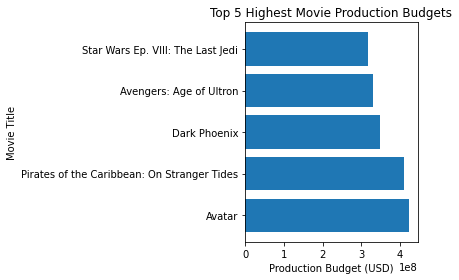

In [30]:
# Visualization of the movies with highest production budgets

plt.figure()
plt.barh(highest_budget_movies["movie"], highest_budget_movies["production_budget"])
plt.title("Top 5 Highest Movie Production Budgets")
plt.xlabel("Production Budget (USD)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

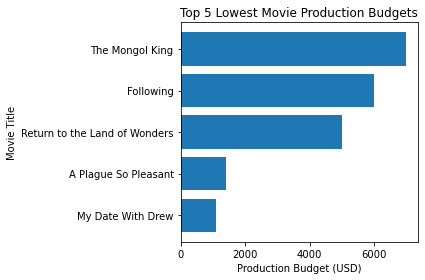

In [31]:
#Visualization of the movies with lowest production budgets.

plt.figure()
plt.barh(lowest_budget_movies["movie"], lowest_budget_movies["production_budget"])
plt.title("Top 5 Lowest Movie Production Budgets")
plt.xlabel("Production Budget (USD)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

Genre classifications were checked manually using IMDb  https://www.imdb.com/list/ls564012879/. Since there is no unique identifier that connects genre and budget data in the datasets, genre analysis was used for contextual understanding instead of directly merging the datasets.

Analysis of production budgets from the Numbers dataset shows that the highest production costs are consistently linked to Action, Adventure, and Science Fiction films. This trend reflects the resource-heavy nature of blockbuster productions, which often involve extensive visual effects, large casts, and worldwide filming needs.



Business Question 5: What was the income generated from the 5 most common movie genres?

In [32]:
# Using data from the numbers_df

# Top 5 movies with highest income generated

#Selecting relevant columns
income_df = numbers_df[["movie", "worldwide_gross"]]

# Top 5 highest income movies from numbers_df

top_income_movies = (
    income_df
    .sort_values(by="worldwide_gross", ascending=False)
    .head(5)
)

top_income_movies

,movie,worldwide_gross
0,Avatar,2.776345e+09
42,Titanic,2.208208e+09
5,Star Wars Ep. VII: The Force Awakens,2.053311e+09
6,Avengers: Infinity War,2.048134e+09
33,Jurassic World,1.648855e+09


Avatar, Titanic, Star Wars, Avengers, Jurrasic world generated the most income from the numbers_df.

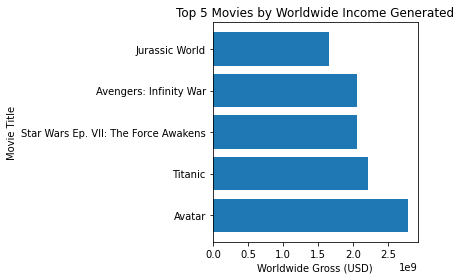

In [33]:
# Visualization of the Top 5 Highest Income Generating Movies from numbers_df

plt.figure()
plt.barh(
    top_income_movies["movie"],
    top_income_movies["worldwide_gross"]
)
plt.title("Top 5 Movies by Worldwide Income Generated")
plt.xlabel("Worldwide Gross (USD)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


In [34]:
# Using data from the box_office_df 

# Create Total Income Column
box_office_df["total_income"] = (
    box_office_df["domestic_gross"] + box_office_df["foreign_gross"]
)

#Identify Top 5 movies by total income from box_office_df

top_income_movies = (
    box_office_df
    .sort_values(by="total_income", ascending=False)
    .head(5)
)

top_income_movies[["title", "total_income"]]


,title,total_income
727,Marvel's The Avengers,1.518900e+09
1875,Avengers: Age of Ultron,1.405400e+09
3080,Black Panther,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,1.341500e+09
2758,Star Wars: The Last Jedi,1.332600e+09


Marvel's Avengers, Age of Ultron, Black Panther, Harry Potter and Deathly Hallows Part 2 and Stars Wars Jedi generated the most income from the box office df.

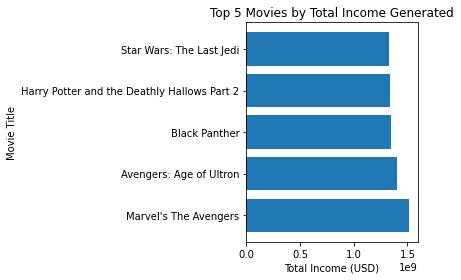

In [35]:
# Visualization of the top 5 movies most financially beneficial movies

plt.figure()
plt.barh(
    top_income_movies["title"],
    top_income_movies["total_income"]
)
plt.title("Top 5 Movies by Total Income Generated")
plt.xlabel("Total Income (USD)")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

To determine the income generated from the 5 most common movie genres, a reliable identifier that links genre information fom ***IMDb*** with income data from ***The Numbers*** and ***Box Office Mojo*** movie datasets is required. Because such an identifier is not available from the datasets provided, an accurate income analysis by genre cannot be carried out without risking data quality.

However  genre classifications for the top 5 movies with highest income generated from ***The Numbers*** and ***Box Office Mojo*** datasets were verified manually using ***IMBd*** website, https://www.imdb.com/list/ls564012879/ . Since there was no unique identifier connecting genre and revenue data among the IMBd, Numbers and Box Office datasets, genre information serves for context rather than direct integration with the datasets.

***Top 5 movies with highest income generated from The Numbers dataset***

***(Genres sourced via manual verification from IMBd, https://www.imdb.com/list/ls564012879/)***

1. Avatar

   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 2.78 B 

2. Titanic

   ***Genres*** - Drama, Romance

   ***Income generated*** - $ 2.21 B

3. Star Wars: The Force Awakens
   
   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 2.05 B

4. Avengers: Infinity War
   
   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 2.05 B

5. Jurassic World

   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 1.67 B


***Top 5 movies with highest income generated from the Box Office Mojo dataset***

1. Marvel's The Avengers

   ***Genres*** - Action, Adventure, Sci-Fi 

   ***Income generated*** - $ 1.52 B

2. Avengers: Age of Ultron

   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 1.40 B

3. Black Panther

   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 1.35 B

4. Harry Potter and The Deathly Hallows - Part 2

   ***Genres*** - Adventure, Fantasy

   ***Income generated*** - $ 1.34 B

5. Star Wars: The last Jedi

   ***Genres*** - Action, Adventure, Sci-Fi

   ***Income generated*** - $ 1.33 B


Among the ten movies with the highest income, Action, Adventure, and Science Fiction take the lead. These genres are present in 8 out of the 10 films and make up most of the total revenue.

In contrast, genres like Drama, Romance, and Fantasy show up less often but still generate  substantial revenues in some cases.



Sub-analysis (Regression analysis)

Model Parameters:
const               -6.915003e+06
production_budget    3.140476e+00
dtype: float64


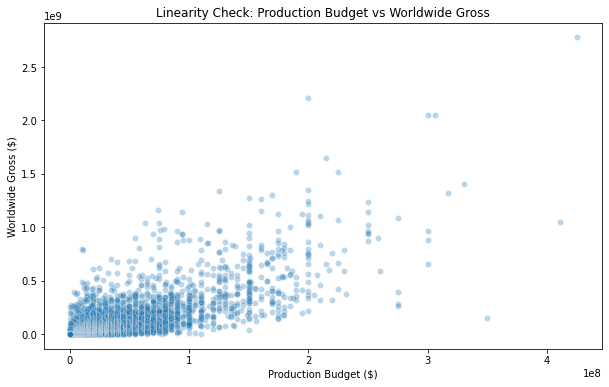

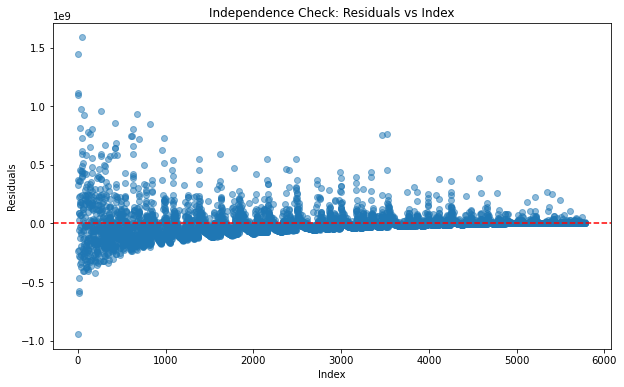

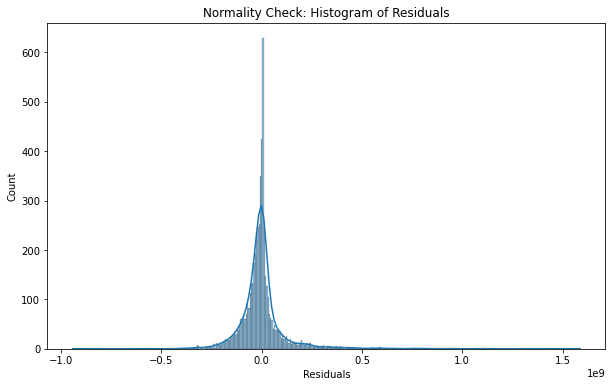

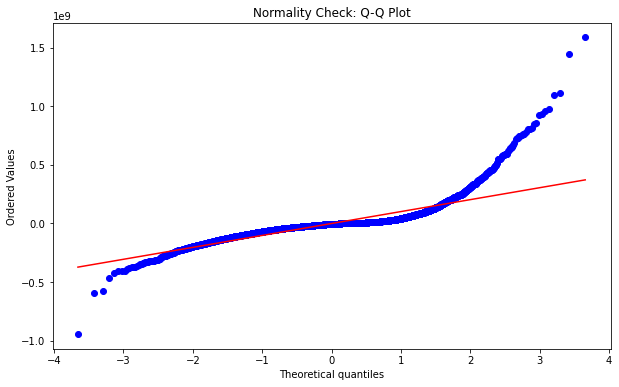

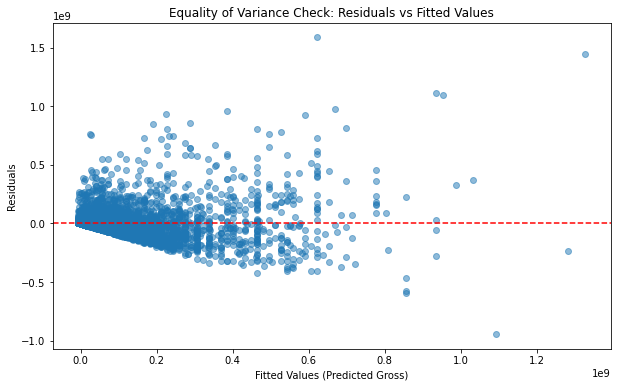

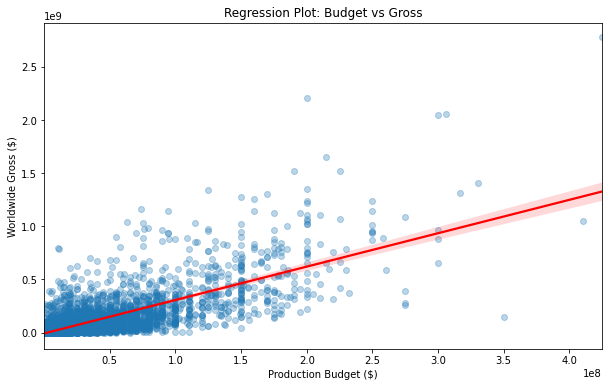

In [36]:
# In this section, the main regression question was: Does a higher production budget lead to higher gross income for movies?
# In addition to the imported libraries, we will need statsmodels. as well
import statsmodels.api as sm

# Clean the data: Filter out movies with $0 gross or budget which are likely errors or unreleased hence no profit yet
clean_df = numbers_df[(numbers_df['production_budget'] > 0) & (numbers_df['worldwide_gross'] > 0)].copy()

# Define variables
X = clean_df['production_budget']
y = clean_df['worldwide_gross']

# Add a constant to the independent variable 
X_const = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_const).fit()

# Print the regression summary
print("Model Parameters:")
print(model.params)

# Checking whether our variables meet the assumptions for linear regression

# Linearity

# Plotting the data to check for linearity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=clean_df, alpha=0.3)
plt.title('Linearity Check: Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show() # this shows a general upwards trend, hence there is a linear relationship



# Independence of errors

# Calculate residuals
residuals = model.resid

# Plot residuals to check for patterns
plt.figure(figsize=(10, 6))
plt.plot(residuals, 'o', alpha=0.5)
plt.title('Independence Check: Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show() # the assumption that each movie is an independent entity is met


# Normality
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Normality Check: Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()  # residuals are normally distributed

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Check: Q-Q Plot')
plt.show()




# Equality of Variance
# Residuals vs Fitted values
fitted_vals = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Equality of Variance Check: Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted Gross)')
plt.ylabel('Residuals')
plt.show()



# Regression plot (y = mx + c)
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=clean_df, 
            line_kws={"color": "red"}, scatter_kws={'alpha':0.3})
plt.title('Regression Plot: Budget vs Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()




### Intrepretation of the Regression Analysis results

Our model met the assumptions of linearity, independence of errors and equality of variances. 
Regression formula: gross income = 3.14(production costs) - 6.91.

There is a strong, positive relationship between spending more on production and earning higher revenue. On average, every dollar spent on production yields about $3.14 in return. However, this strategy comes with higher risk; as budgets increase, the variability in returns also increases, meaning high-budget movies can result in massive profits but also significant losses.

# Business Recommendation

Based on our results:

1. Drama, Comedy and Documentary were most commonly produced

2. Biography, Music and Documentary received the highest total votes.

3. Documentary, Gameshow and News received the highest audience ratings.
   
4. Action, Adventure, and Science Fiction had the highest income.

*Recalling our business goal*: Which movie genres are the most commercially successful and financially viable, we recommend Documentaries are the most since they are commonly produced, had one of the highest total votes and highest audience ratings.

# Limitations

1. We left out the rotten tomatoes movie source since the rating column that we would have used from it had both numerical and non_numerical grade ratings that would have made data analysis difficult.

2. We also opted to leave out the tmdb movie source since the movie genres within it were coded under the ID column, and there was no references to use, to help us know which movie ID belonged to which movie genre.

3. We could not use IMDB for regression analysis as it didn't have the columns or data on production budgets or gross incomes for the movie titles. Similarly, Box office mojo lacked the production cost column and therefore was also not used for regression analysis.

4. Genre classifications during assessment of the production costs and income generated per movie genres were checked manually using IMDb  https://www.imdb.com/list/ls564012879/. Since there was no unique identifier for the numbers dataframe that connects genre and budget data in our analysis.

# Suggestions for further analysis

We suggest that for future analysis: 

1. Improvement of Genre Classification be done to address genre inconsistencies across datasets by creating a standardized genre mapping.

2. We also suggest Temporal Trends and Lifecycle Analysis of genre performance over time to identify emerging trends and declining popularity.
